- Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

In [3]:
delayed_flights = pd.read_csv('C:\\Users\\formacio\\Gabriel De Santis\\Datasets\\DelayedFlights.csv', sep=',')

delayed_flights

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
delayed_flights.drop(columns='Unnamed: 0', inplace=True)

Abans que res, eliminarem la variable Year ja que tots els vols del dataset son del 2008 i ens sembla redundant.

In [5]:
delayed_flights.drop(columns='Year', inplace=True)

A continuació, farem neteja de valors nuls.

Observem que els vols cancelats produeixen una gran quantitat de null values a diferents variables. Pensem que lo millor serà eliminar les files, ja que el nombre de vols cancelats és petit.


In [6]:
delayed_flights.isna().sum() / len(delayed_flights) * 100

Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               0.000000
CRSDepTime            0.000000
ArrTime               0.367108
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               0.000258
ActualElapsedTime     0.433043
CRSElapsedTime        0.010223
AirTime               0.433043
ArrDelay              0.433043
DepDelay              0.000000
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                0.367108
TaxiOut               0.023493
Cancelled             0.000000
CancellationCode      0.000000
Diverted              0.000000
CarrierDelay         35.588855
WeatherDelay         35.588855
NASDelay             35.588855
SecurityDelay        35.588855
LateAircraftDelay    35.588855
dtype: float64

In [7]:
delayed_flights.isna().sum() / len(delayed_flights) * 100

Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               0.000000
CRSDepTime            0.000000
ArrTime               0.367108
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               0.000258
ActualElapsedTime     0.433043
CRSElapsedTime        0.010223
AirTime               0.433043
ArrDelay              0.433043
DepDelay              0.000000
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                0.367108
TaxiOut               0.023493
Cancelled             0.000000
CancellationCode      0.000000
Diverted              0.000000
CarrierDelay         35.588855
WeatherDelay         35.588855
NASDelay             35.588855
SecurityDelay        35.588855
LateAircraftDelay    35.588855
dtype: float64

In [8]:
delayed_flights[delayed_flights.Cancelled == 1].isna().sum() / len(delayed_flights[delayed_flights.Cancelled == 1]) * 100

Month                  0.000000
DayofMonth             0.000000
DayOfWeek              0.000000
DepTime                0.000000
CRSDepTime             0.000000
ArrTime              100.000000
CRSArrTime             0.000000
UniqueCarrier          0.000000
FlightNum              0.000000
TailNum                0.000000
ActualElapsedTime    100.000000
CRSElapsedTime         0.000000
AirTime              100.000000
ArrDelay             100.000000
DepDelay               0.000000
Origin                 0.000000
Dest                   0.000000
Distance               0.000000
TaxiIn               100.000000
TaxiOut               71.879937
Cancelled              0.000000
CancellationCode       0.000000
Diverted               0.000000
CarrierDelay         100.000000
WeatherDelay         100.000000
NASDelay             100.000000
SecurityDelay        100.000000
LateAircraftDelay    100.000000
dtype: float64

In [9]:
indexes = delayed_flights[delayed_flights.Cancelled == 1].index.values
delayed_flights.drop(index=indexes, inplace=True)

Hem eliminat tots els vols cancelats, per tant, la variable Cancelled ja no ens aporta cap informació. Per aquest motiu, l'eliminem.

In [10]:
delayed_flights.drop(columns='Cancelled', inplace=True)
delayed_flights.reset_index(drop=True, inplace=True)

Sembla que els null values de les variables CarrierDelay, WeatherDelay, etc. están relacionats amb ArrDelay, és a dir, que quan el retràs no supera els 14 minuts, no es recullen valors. En aquest cas, creiem que serà convenient imputar-los per 0.

In [11]:
delayed_flights[delayed_flights.CarrierDelay.isna()].ArrDelay.max()

14.0

In [12]:
indices = delayed_flights[delayed_flights.ArrDelay < 15][['CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].index.values

delayed_flights.iloc[indices, -5:] = delayed_flights.iloc[indices, -5:].fillna(0)

Sembla que els vols desviats també afecten als valors nuls d'altres variables. Així que els eliminarem de la mateixa forma que els cancelats.

In [13]:
delayed_flights[delayed_flights.Diverted == 1].isna().sum() / len(delayed_flights[delayed_flights.Diverted == 1]) * 100

Month                  0.000000
DayofMonth             0.000000
DayOfWeek              0.000000
DepTime                0.000000
CRSDepTime             0.000000
ArrTime               83.531081
CRSArrTime             0.000000
UniqueCarrier          0.000000
FlightNum              0.000000
TailNum                0.025793
ActualElapsedTime    100.000000
CRSElapsedTime         2.553521
AirTime              100.000000
ArrDelay             100.000000
DepDelay               0.000000
Origin                 0.000000
Dest                   0.000000
Distance               0.000000
TaxiIn                83.531081
TaxiOut                0.000000
CancellationCode       0.000000
Diverted               0.000000
CarrierDelay         100.000000
WeatherDelay         100.000000
NASDelay             100.000000
SecurityDelay        100.000000
LateAircraftDelay    100.000000
dtype: float64

In [14]:
indices = delayed_flights[delayed_flights.Diverted == 1].index.values
delayed_flights.drop(index=indices, inplace=True)
delayed_flights.drop(columns='Diverted', inplace=True)
delayed_flights.reset_index(drop=True, inplace=True)
delayed_flights.isna().sum() / len(delayed_flights) * 100

Month                0.000000
DayofMonth           0.000000
DayOfWeek            0.000000
DepTime              0.000000
CRSDepTime           0.000000
ArrTime              0.000000
CRSArrTime           0.000000
UniqueCarrier        0.000000
FlightNum            0.000000
TailNum              0.000156
ActualElapsedTime    0.000000
CRSElapsedTime       0.000000
AirTime              0.000000
ArrDelay             0.000000
DepDelay             0.000000
Origin               0.000000
Dest                 0.000000
Distance             0.000000
TaxiIn               0.000000
TaxiOut              0.000000
CancellationCode     0.000000
CarrierDelay         0.000000
WeatherDelay         0.000000
NASDelay             0.000000
SecurityDelay        0.000000
LateAircraftDelay    0.000000
dtype: float64

Per acabar, hem decidit imputar els valors nuls de TailNum per la moda.

In [15]:
delayed_flights.TailNum.fillna(delayed_flights.TailNum.mode()[0], inplace=True)
delayed_flights.isna().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
CancellationCode     0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

Convertirem ArrDelay en una variable dummy.

In [16]:
delayed_flights.ArrDelay = delayed_flights.ArrDelay.apply(lambda x: 1 if (x > 0) else 0)
delayed_flights.ArrDelay

0          0
1          1
2          1
3          1
4          1
          ..
1928366    1
1928367    1
1928368    1
1928369    1
1928370    0
Name: ArrDelay, Length: 1928371, dtype: int64

Separar les variables per tipus

In [17]:
cyclical = ['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
nominal = ['UniqueCarrier', 'FlightNum', 'TailNum', 'Origin', 'Dest', 'CancellationCode']
numerical = ['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 
            'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
           'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
binomial = ['ArrDelay']

In [18]:
delayed_flights[numerical].skew()

ActualElapsedTime     1.427101
CRSElapsedTime        1.439446
AirTime               1.495251
DepDelay              4.500579
Distance              1.546581
TaxiIn                5.989240
TaxiOut               4.497800
CarrierDelay          8.863144
WeatherDelay         15.595925
NASDelay              6.151299
SecurityDelay        64.912970
LateAircraftDelay     4.045036
dtype: float64

In [19]:
delayed_flights[numerical] = pd.DataFrame(data=np.ma.log(delayed_flights[numerical].values).filled(0), columns=numerical)
delayed_flights[numerical].skew()

ActualElapsedTime     0.133347
CRSElapsedTime        0.193822
AirTime               0.002158
DepDelay              0.382507
Distance             -0.213776
TaxiIn                0.452935
TaxiOut               0.671148
CarrierDelay          1.190391
WeatherDelay          4.788023
NASDelay              1.364237
SecurityDelay        20.740511
LateAircraftDelay     0.916293
dtype: float64

Aplicarem cyclical transforming per a les variables cícliques (temporals), frequency encoding per a les nominals i estandarditzarem les variables numèriques. Les variables cancelled i diverted son binomials, però no requereixen cap tipus de transformació.

In [20]:
for column in cyclical[:3]:
    print(np.sort(delayed_flights[column].unique()))
    print('='*64)

for column in cyclical[3:]:
    print(delayed_flights[column].min(), delayed_flights[column].max())
    print('='*64)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
[1 2 3 4 5 6 7]
1.0 2400.0
0 2359
1.0 2400.0
0 2359


In [21]:
delayed_flights['mnth_sin'] = np.sin((delayed_flights.Month -1)*(2.*np.pi/12))
delayed_flights['mnth_cos'] = np.cos((delayed_flights.Month -1)*(2.*np.pi/12))
delayed_flights['day_M_sin'] = np.sin((delayed_flights.DayofMonth -1)*(2.*np.pi/31))
delayed_flights['day_M_cos'] = np.cos((delayed_flights.DayofMonth -1)*(2.*np.pi/31))
delayed_flights['day_W_sin'] = np.sin((delayed_flights.DayOfWeek -1)*(2.*np.pi/7))
delayed_flights['day_W_cos'] = np.cos((delayed_flights.DayOfWeek -1)*(2.*np.pi/7))

In [22]:
round(delayed_flights[['Month','mnth_sin', 'mnth_cos', 'DayofMonth', 'day_M_sin', 'day_M_cos', 'DayOfWeek', 'day_W_sin', 'day_W_cos']][::200000], 3)

,Month,mnth_sin,mnth_cos,DayofMonth,day_M_sin,day_M_cos,DayOfWeek,day_W_sin,day_W_cos
0,1,0.000,1.000,3,0.394,0.919,4,0.434,-0.901
200000,2,0.500,0.866,15,0.299,-0.954,5,-0.434,-0.901
400000,3,0.866,0.500,24,-0.999,-0.051,1,0.000,1.000
600000,4,1.000,0.000,14,0.485,-0.874,1,0.000,1.000
800000,5,0.866,-0.500,20,-0.651,-0.759,2,0.782,0.623
1000000,6,0.500,-0.866,22,-0.898,-0.440,7,-0.782,0.623
1200000,7,0.000,-1.000,1,0.000,1.000,2,0.782,0.623
1400000,8,-0.500,-0.866,20,-0.651,-0.759,3,0.975,-0.223
1600000,10,-1.000,-0.000,14,0.485,-0.874,2,0.782,0.623
1800000,12,-0.500,0.866,22,-0.898,-0.440,1,0.000,1.000


In [23]:
delayed_flights['DepTime_sin'] = np.sin((delayed_flights.DepTime)*(2.*np.pi/2400))
delayed_flights['DepTime_cos'] = np.cos((delayed_flights.DepTime)*(2.*np.pi/2400))
delayed_flights['CRSDepTime_sin'] = np.sin((delayed_flights.CRSDepTime)*(2.*np.pi/2359))
delayed_flights['CRSDepTime_cos'] = np.cos((delayed_flights.CRSDepTime)*(2.*np.pi/2359))
delayed_flights['ArrTime_sin'] = np.sin((delayed_flights.ArrTime)*(2.*np.pi/2400))
delayed_flights['ArrTime_cos'] = np.cos((delayed_flights.ArrTime)*(2.*np.pi/2400))
delayed_flights['CRSArrTime_sin'] = np.sin((delayed_flights.CRSArrTime)*(2.*np.pi/2400))
delayed_flights['CRSArrTime_cos'] = np.cos((delayed_flights.CRSArrTime)*(2.*np.pi/2400))

In [24]:
delayed_flights[delayed_flights.CRSDepTime == 0][['CRSDepTime', 'CRSDepTime_sin', 'CRSDepTime_cos']]

,CRSDepTime,CRSDepTime_sin,CRSDepTime_cos
250004,0,0.0,1.0
945888,0,0.0,1.0


In [25]:
round(delayed_flights[delayed_flights.CRSDepTime == 2358][['CRSDepTime', 'CRSDepTime_sin', 'CRSDepTime_cos']], 5)

,CRSDepTime,CRSDepTime_sin,CRSDepTime_cos
81472,2358,-0.00266,1.0
82440,2358,-0.00266,1.0
82838,2358,-0.00266,1.0
89259,2358,-0.00266,1.0
89748,2358,-0.00266,1.0
...,...,...,...
1609959,2358,-0.00266,1.0
1610100,2358,-0.00266,1.0
1610180,2358,-0.00266,1.0
1611059,2358,-0.00266,1.0


Com podem observar, hem aconseguit que els valors siguin cíclics, de forma que la última hora/dia estigui a prop de la primera, que és com passa en el temps cíclic.

In [26]:
delayed_flights.drop(columns=cyclical, inplace=True)
cyclical = ['mnth_sin', 'mnth_cos', 'day_M_sin', 'day_M_cos', 'day_W_sin', 'day_W_cos', 'DepTime_sin', 'DepTime_cos', 'ArrTime_sin',
       'ArrTime_cos', 'CRSDepTime_sin', 'CRSDepTime_cos', 'CRSArrTime_sin',
       'CRSArrTime_cos']
delayed_flights[cyclical]

,mnth_sin,mnth_cos,day_M_sin,day_M_cos,day_W_sin,day_W_cos,DepTime_sin,DepTime_cos,ArrTime_sin,ArrTime_cos,CRSDepTime_sin,CRSDepTime_cos,CRSArrTime_sin,CRSArrTime_cos
0,0.0,1.000000,0.394356,0.918958,0.433884,-0.900969,-0.862072,0.506786,-0.474856,0.880063,-0.880090,0.474807,-0.442289,0.896873
1,0.0,1.000000,0.394356,0.918958,0.433884,-0.900969,0.919821,-0.392337,0.495459,-0.868632,0.926094,-0.377294,0.500000,-0.866025
2,0.0,1.000000,0.394356,0.918958,0.433884,-0.900969,0.997314,-0.073238,0.860742,-0.509041,0.996756,-0.080484,0.923880,-0.382683
3,0.0,1.000000,0.394356,0.918958,0.433884,-0.900969,-0.997119,0.075849,-0.914607,0.404344,-0.999280,-0.037946,-0.946930,0.321439
4,0.0,1.000000,0.394356,0.918958,0.433884,-0.900969,-0.933580,0.358368,-0.667183,0.744894,-0.925590,0.378527,-0.688355,0.725374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928366,-0.5,0.866025,0.651372,-0.758758,-0.974928,-0.222521,-0.130526,-0.991445,-0.887413,-0.460974,-0.107662,-0.994188,-0.796530,-0.604599
1928367,-0.5,0.866025,0.651372,-0.758758,-0.974928,-0.222521,0.988886,-0.148672,0.699663,-0.714473,0.999627,-0.027297,0.924878,-0.380263
1928368,-0.5,0.866025,0.651372,-0.758758,-0.974928,-0.222521,0.484046,-0.875042,0.133121,-0.991100,0.774303,-0.632816,0.477159,-0.878817
1928369,-0.5,0.866025,0.651372,-0.758758,-0.974928,-0.222521,-0.133121,-0.991100,-0.600420,-0.799685,-0.160445,-0.987045,-0.581413,-0.813608


In [27]:
for column in nominal:
    mapping = delayed_flights[column].value_counts() / len(delayed_flights)
    delayed_flights[column] = delayed_flights[column].map(mapping)

delayed_flights[nominal]

,UniqueCarrier,FlightNum,TailNum,Origin,Dest,CancellationCode
0,0.195087,0.000373,0.000332,0.011429,0.011712,1.0
1,0.195087,0.000083,0.000334,0.011429,0.011712,1.0
2,0.195087,0.000571,0.000311,0.005016,0.015323,1.0
3,0.195087,0.000200,0.000365,0.005016,0.015323,1.0
4,0.195087,0.000639,0.000334,0.005016,0.004954,1.0
...,...,...,...,...,...,...
1928366,0.058976,0.000331,0.000230,0.016746,0.055249,1.0
1928367,0.058976,0.000212,0.000149,0.002468,0.055249,1.0
1928368,0.058976,0.000212,0.000193,0.068043,0.022625,1.0
1928369,0.058976,0.000279,0.000155,0.011429,0.055249,1.0


In [28]:
scaler = StandardScaler()
delayed_flights[numerical] = scaler.fit_transform(delayed_flights[numerical])
delayed_flights[numerical]

,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.176502,0.477836,0.413230,-1.247490,0.429530,-0.655909,-1.158817,-0.643736,-0.217514,-0.617016,-0.052188,-0.699704
1,0.176502,0.408951,0.369975,-0.344573,0.429530,-0.251732,-0.757698,-0.643736,-0.217514,-0.617016,-0.052188,-0.699704
2,-0.391238,-0.560111,-0.284821,-1.247490,-0.167982,-1.176984,0.196150,-0.643736,-0.217514,-0.617016,-0.052188,-0.699704
3,-0.518605,-0.560111,-0.263242,0.262858,-0.167982,-1.176984,-0.757698,-0.198431,-0.217514,-0.617016,-0.052188,1.309586
4,-0.291039,-0.062047,-0.061675,-0.058106,0.214145,-0.655909,-0.757698,-0.643736,-0.217514,-0.617016,-0.052188,-0.699704
...,...,...,...,...,...,...,...,...,...,...,...,...
1928366,0.449638,0.504749,0.469194,0.132208,0.577309,0.812917,0.298897,0.062056,-0.217514,-0.617016,-0.052188,1.092354
1928367,0.161023,-0.170924,-0.241941,0.802199,-0.258096,1.738168,1.442139,-0.643736,5.116984,1.397736,-0.052188,-0.699704
1928368,0.641390,0.380730,0.496481,1.156034,0.216061,0.599578,1.333162,-0.643736,-0.217514,1.435423,-0.052188,1.833521
1928369,-0.034856,-0.027013,-0.024155,-0.915076,-0.122655,1.478972,-0.286077,-0.643736,-0.217514,-0.617016,-0.052188,-0.699704


In [29]:
delayed_flights

,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,...,day_W_sin,day_W_cos,DepTime_sin,DepTime_cos,CRSDepTime_sin,CRSDepTime_cos,ArrTime_sin,ArrTime_cos,CRSArrTime_sin,CRSArrTime_cos
0,0.195087,0.000373,0.000332,0.176502,0.477836,0.413230,0,-1.247490,0.011429,0.011712,...,0.433884,-0.900969,-0.862072,0.506786,-0.880090,0.474807,-0.474856,0.880063,-0.442289,0.896873
1,0.195087,0.000083,0.000334,0.176502,0.408951,0.369975,1,-0.344573,0.011429,0.011712,...,0.433884,-0.900969,0.919821,-0.392337,0.926094,-0.377294,0.495459,-0.868632,0.500000,-0.866025
2,0.195087,0.000571,0.000311,-0.391238,-0.560111,-0.284821,1,-1.247490,0.005016,0.015323,...,0.433884,-0.900969,0.997314,-0.073238,0.996756,-0.080484,0.860742,-0.509041,0.923880,-0.382683
3,0.195087,0.000200,0.000365,-0.518605,-0.560111,-0.263242,1,0.262858,0.005016,0.015323,...,0.433884,-0.900969,-0.997119,0.075849,-0.999280,-0.037946,-0.914607,0.404344,-0.946930,0.321439
4,0.195087,0.000639,0.000334,-0.291039,-0.062047,-0.061675,1,-0.058106,0.005016,0.004954,...,0.433884,-0.900969,-0.933580,0.358368,-0.925590,0.378527,-0.667183,0.744894,-0.688355,0.725374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928366,0.058976,0.000331,0.000230,0.449638,0.504749,0.469194,1,0.132208,0.016746,0.055249,...,-0.974928,-0.222521,-0.130526,-0.991445,-0.107662,-0.994188,-0.887413,-0.460974,-0.796530,-0.604599
1928367,0.058976,0.000212,0.000149,0.161023,-0.170924,-0.241941,1,0.802199,0.002468,0.055249,...,-0.974928,-0.222521,0.988886,-0.148672,0.999627,-0.027297,0.699663,-0.714473,0.924878,-0.380263
1928368,0.058976,0.000212,0.000193,0.641390,0.380730,0.496481,1,1.156034,0.068043,0.022625,...,-0.974928,-0.222521,0.484046,-0.875042,0.774303,-0.632816,0.133121,-0.991100,0.477159,-0.878817
1928369,0.058976,0.000279,0.000155,-0.034856,-0.027013,-0.024155,1,-0.915076,0.011429,0.055249,...,-0.974928,-0.222521,-0.133121,-0.991100,-0.160445,-0.987045,-0.600420,-0.799685,-0.581413,-0.813608


Realitzarem els següents exercicis alhora, ja que és difícil segmentar el treball i fer-los un a un

- Exercici 1

Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).

- Exercici 2

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

- Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.

- Exercici 6

No utilitzis la variable DepDelay a l’hora de fer prediccions


In [30]:
delayed_flights.ArrDelay.value_counts()

1    1723415
0     204956
Name: ArrDelay, dtype: int64

[None]

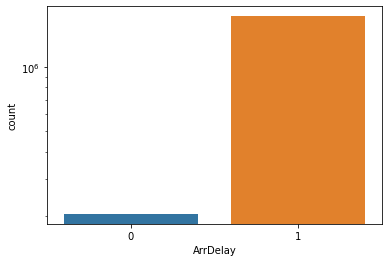

In [31]:
fig = sns.countplot(x=delayed_flights.ArrDelay)
fig.set(yscale="log")

En primer lloc, veiem que el nostre target està desbalancejat. Abans d'aplicar SMOTE, establirem el nostre baseline en base a un model que només prediu que hi haurà retràs.

In [32]:
metrics.accuracy_score(delayed_flights.ArrDelay, np.ones(len(delayed_flights)))

0.8937154728006177

L'accuracy no resulta molt fiable quan tractem un data set desbalancejat. Només cal veure la matriu de confusió a continuació (204956 False Positives).

In [33]:
metrics.confusion_matrix(delayed_flights.ArrDelay, np.ones(len(delayed_flights)))

array([[      0,  204956],
       [      0, 1723415]], dtype=int64)

Ens servirá més aviat el valor AUC a la hora de comparar la efectivitat dels models.

In [34]:
metrics.roc_auc_score(delayed_flights.ArrDelay, np.ones(len(delayed_flights)))

0.5

In [35]:
y = pd.DataFrame(data=delayed_flights.ArrDelay)
X = delayed_flights.drop(columns=['ArrDelay', 'DepDelay'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y, shuffle=True)

In [36]:
y_train.value_counts()

ArrDelay
1           1154688
0            137320
dtype: int64

In [37]:
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
#print('Mean ROC AUC: %.3f' % mean(scores))
#model = DecisionTreeClassifier()

In [ ]:
X_train, y_train = SMOTE(sampling_strategy=0.3).fit_resample(X_train, y_train)
X_train, y_train = RandomUnderSampler(sampling_strategy=0.5).fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

## Decision Tree

In [ ]:
def cross_val(cv, model):
    score = cross_validate(model, X_train, y_train, scoring=['roc_auc', 'accuracy'], cv=cv, n_jobs=-1)
    report = pd.DataFrame(data=score).mean()
    return report

In [ ]:
tree = DecisionTreeClassifier(random_state=42)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)

In [ ]:
cross_val(cv, tree)

In [ ]:
#max_depth=5 (Roc 0.89)

## Logistic regression

In [ ]:
logistic = LogisticRegression(random_state=42)
cross_val(cv, logistic)

- Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.